# Cross Correlation EMG-FACET VP46, Response Priming, Anger valid

### I. Prepro Steps:

using fieldtrip toolbox with custom import functions for FACET-export

- Segment Data, selecting only anger valid trials (both)
- baseline correct ([-0.1 0]) (both)
- upsample FACET to Fs=128
- lp filter (both)
- calculate montages (Cor & Zyg) for EMG
- rectify EMG
- z-transform all Channels
(--> no exclusion of error trials etc)

### II. Signal Comparison analysis

using standard matlab functions

Iterate over trials, for each trial:
1. calculate Cross Correlation Function
2. calculate pearson correlation coefficient for unaligned signals
3. align signals (using max of 1)
4. recalculate pearson correlation with aligned signales

with `dat.trial` being an array of 80 cells (one for each trial) and each array being a 4x576 array (4 channels, 576 sampling points). The 2nd channel is the (normalized) anger evidence score, the 3rd the (normalized) EMG Corrugator amplitude:

In [ ]:
for i = 1:length(dat.trial)
    curdat = dat.trial{i};
    S_fac = curdat(2,:);
    S_emg = curdat(3,:);
    r = corrcoef(S_fac, S_emg;
    r_raw(i) = r(1,2);
    [C1,lag1] = xcorr(S_fac,S_emg);
    
    [~,I] = max(abs(C1));
    SampleDiff(i) = lag1(I);
    timeDiff(i) = SampleDiff(i)/Fs;
    
    [S_fac_cor, S_emg_cor] = alignsignals(S_fac, S_emg,[], 'truncate');
    r = corrcoef(S_fac_cor, S_emg_cor, 'rows', 'complete');
    r_alg(i) = r(1,2);
end;

### III. Results

- minimal lag (FACET signal is on average ~70ms ahead in each trial)
- mean pearson correlation of (aligned) signals (across trials): mean(r_alg) = 0.889 (for unaligned signals: mean(r_raw)=0.876

#### III.1. Examples
##### III.1.1. 'Best' trial (highest correlation)

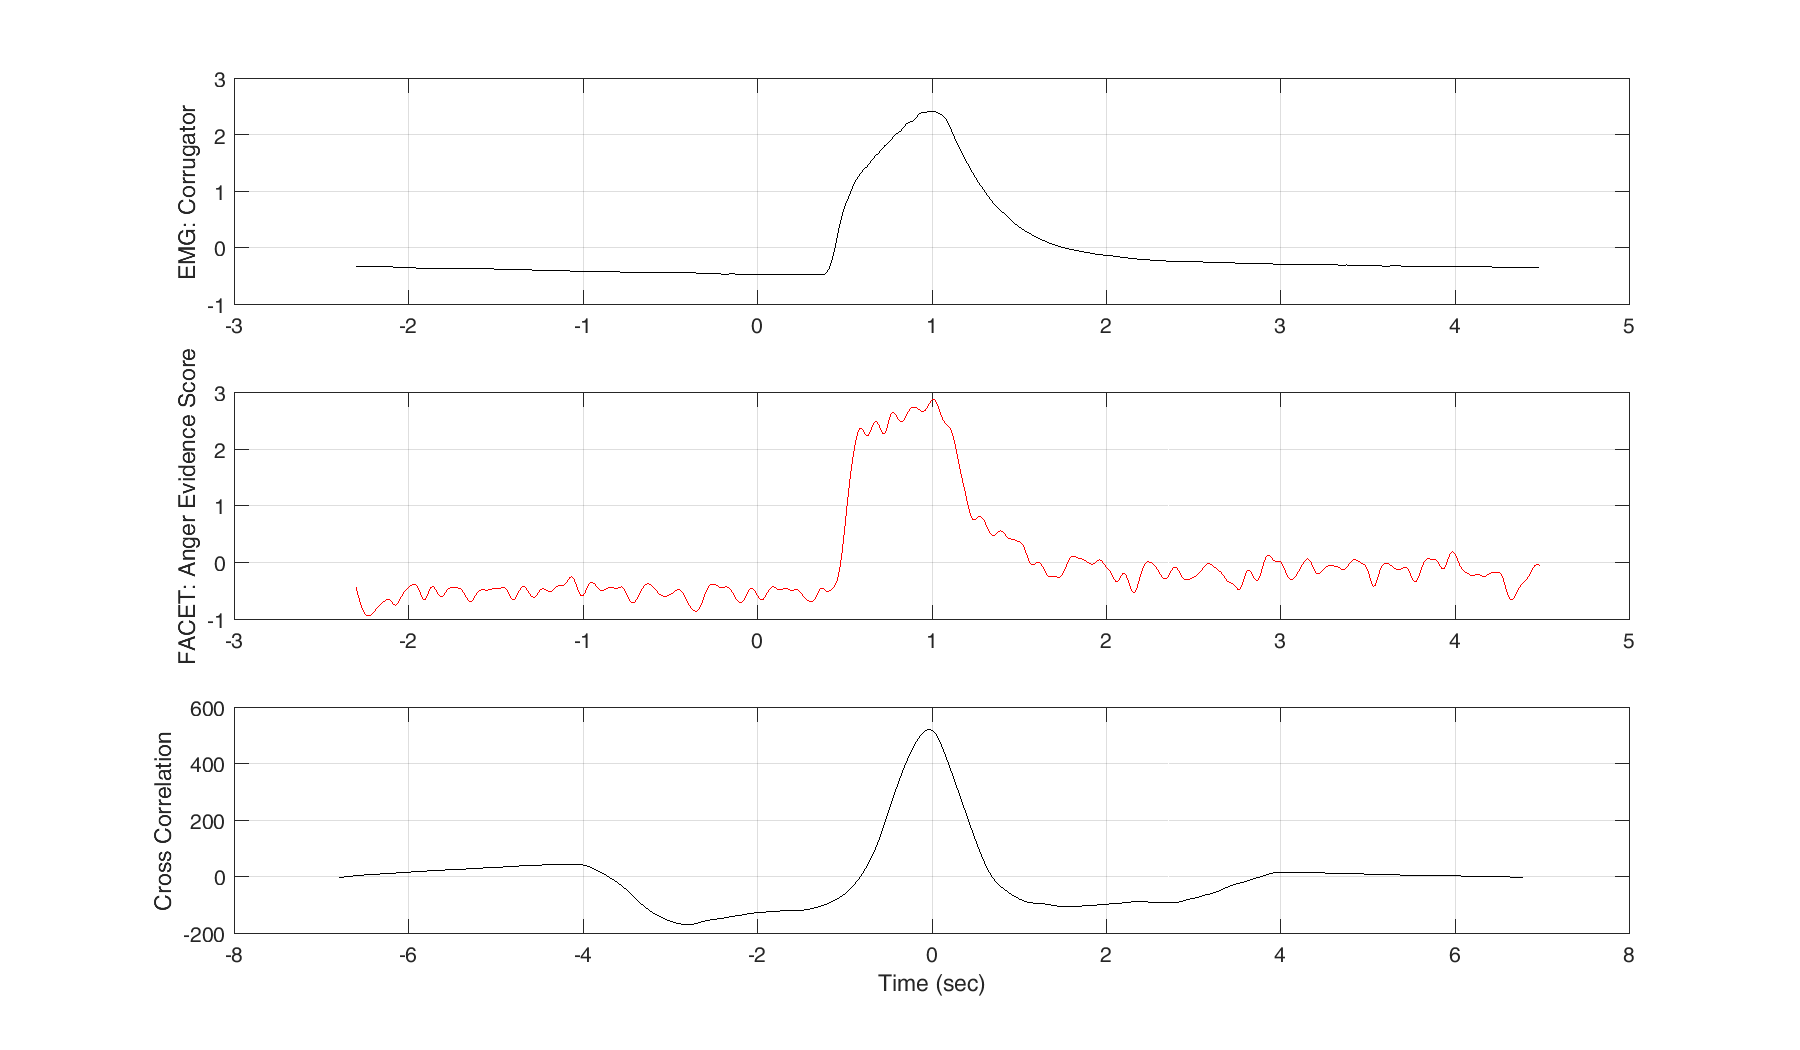

In [24]:
[rmax, rmax_ind] = max(r_alg);

S_fac = dat.trial{rmax_ind}(2,:);
S_emg = dat.trial{rmax_ind}(3,:);
Fs = 128;

[C1,lag1] = xcorr(S_fac,S_emg);
x_ax = (0:numel(S_emg)-1)/Fs -2.3;


figure
ax(1) = subplot(311);
plot(x_ax,S_emg,'k');
ylabel('EMG: Corrugator');
grid on
ax(2) = subplot(312);
plot(x_ax,S_fac,'r');
ylabel('FACET: Anger Evidence Score');
grid on
ax(3) = subplot(313);
plot(lag1/Fs,C1,'k');
ylabel('Cross Correlation');
grid on
xlabel('Time (sec)');

fig = gcf;
fig.PaperPositionMode = 'manual';
fig.PaperSize = [15 10];
fig.PaperPosition = [0 0 12 7];

<!--- ![alt text](./facet_xcorr/best_trial_2.jpg "Title")
-->

`r_alg` = 0.976, `r_raw` = 0.974, `lag` = 23.4 ms

##### III.1.2. 'Worst' trial (lowest correlation)
<!--- ![alt text](./facet_xcorr/worst_trial_2.jpg "Title")
-->

- `r_alg` = 0.714, `r_raw` = 0.614, `lag` = 81.3 ms
- also trial with largest lag

